In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('./train.csv')

In [3]:
train.shape

(614, 13)

In [4]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

Proportion of loan applications approved:  68.72964169381108
Proportion of loan applications rejected:  31.27035830618892


Y    422
N    192
Name: Loan_Status, dtype: int64

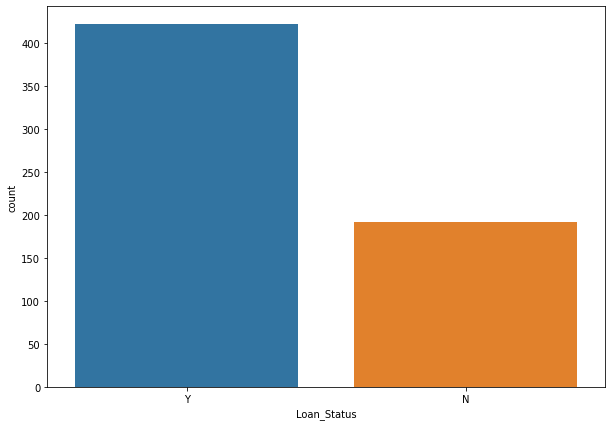

In [7]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Loan_Status', data=train)
print('Proportion of loan applications approved: ', train.Loan_Status.value_counts()[0]/train.shape[0]*100)
print('Proportion of loan applications rejected: ', train.Loan_Status.value_counts()[1]/train.shape[0]*100)
train.Loan_Status.value_counts()

<Figure size 720x504 with 0 Axes>

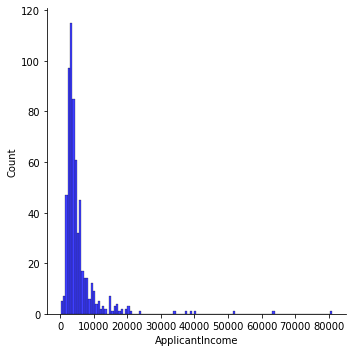

In [8]:
plt.figure(figsize=(10, 7))
sns.displot(x='ApplicantIncome', data=train,color='Blue')

<Figure size 720x504 with 0 Axes>

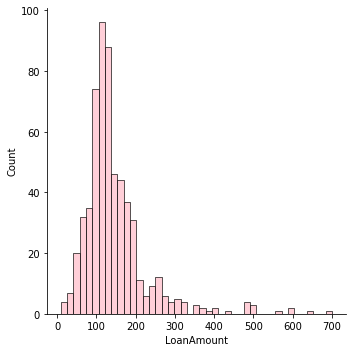

In [9]:
plt.figure(figsize=(10, 7))
sns.displot(x='LoanAmount', data=train,color='pink')

Text(10.2955859375, 0.5, 'Loan Amount (in thousands)')

<Figure size 720x504 with 0 Axes>

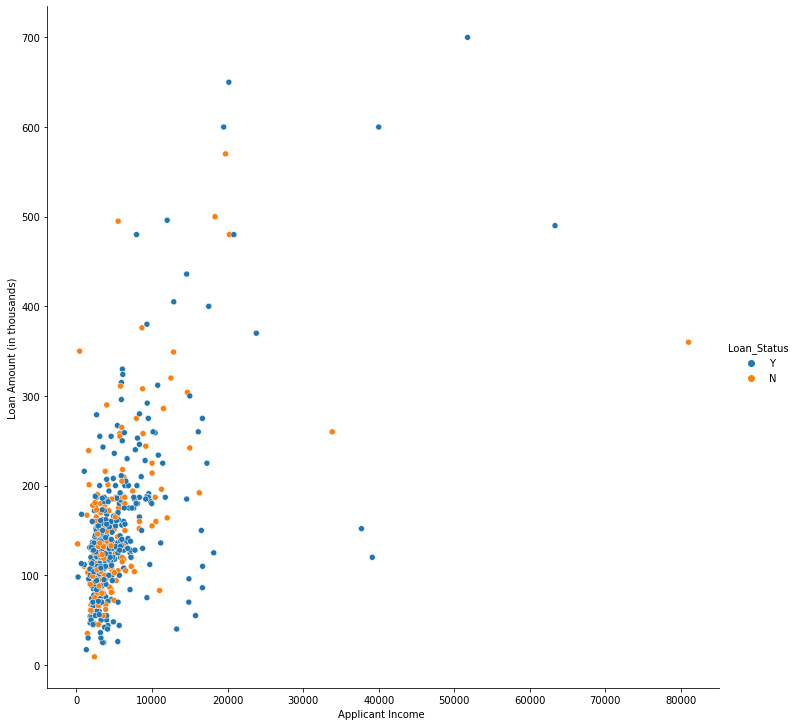

In [10]:
plt.figure(figsize=(10, 7))
sns.relplot(x='ApplicantIncome', y='LoanAmount', data=train, hue='Loan_Status', height=10.0)
plt.xlabel('Applicant Income ')
plt.ylabel('Loan Amount (in thousands)')

<AxesSubplot:xlabel='Gender', ylabel='count'>

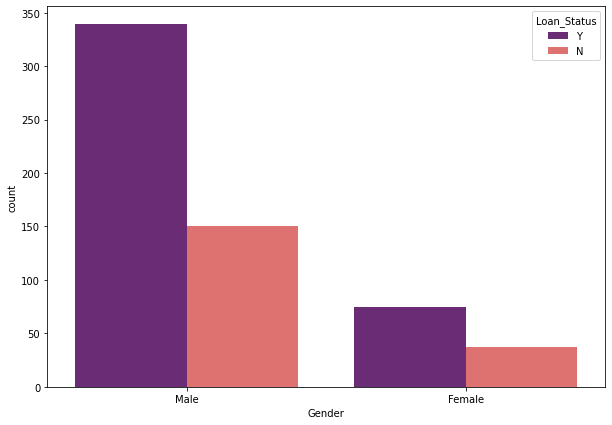

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x='Gender', data=train, hue='Loan_Status', palette='magma')

<AxesSubplot:xlabel='Married', ylabel='count'>

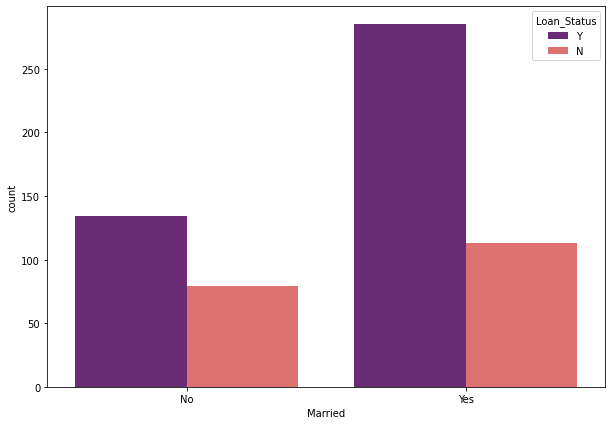

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(x='Married', data=train, hue='Loan_Status', palette='magma')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

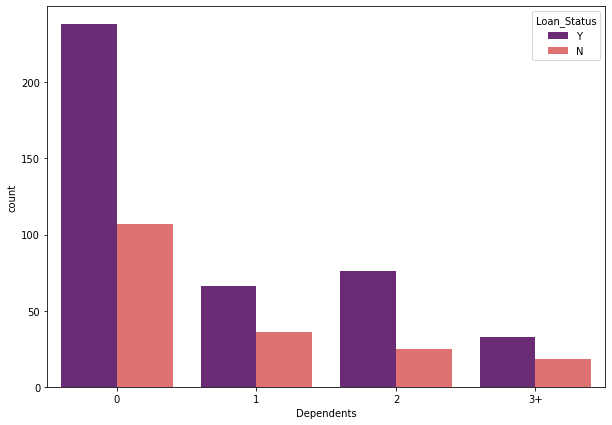

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(x='Dependents', data=train, hue='Loan_Status', palette='magma')

<AxesSubplot:xlabel='Education', ylabel='count'>

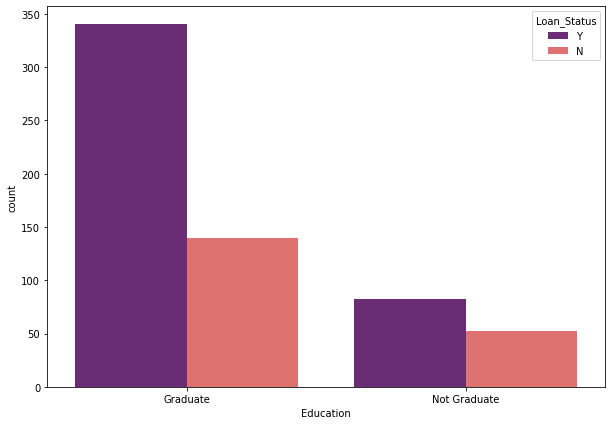

In [14]:
plt.figure(figsize=(10,7))
sns.countplot(x='Education', data=train, hue='Loan_Status', palette='magma')

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(x='Self_Employed', data=train, hue='Loan_Status', palette='magma')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

Text(0.5, 0, 'Loan_Amount_Term (weeks)')

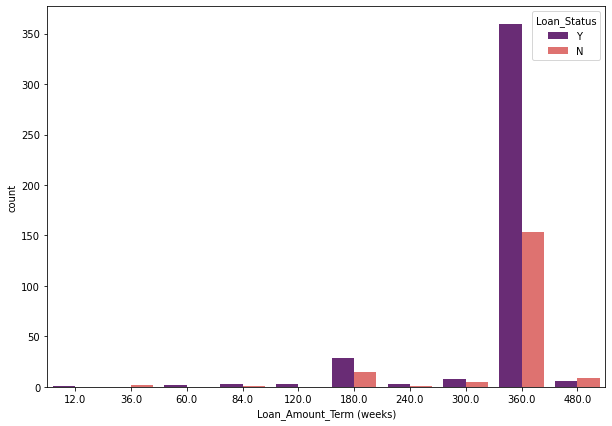

In [16]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Loan_Amount_Term', data=train, hue='Loan_Status', palette='magma')
plt.xlabel('Loan_Amount_Term (weeks)')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

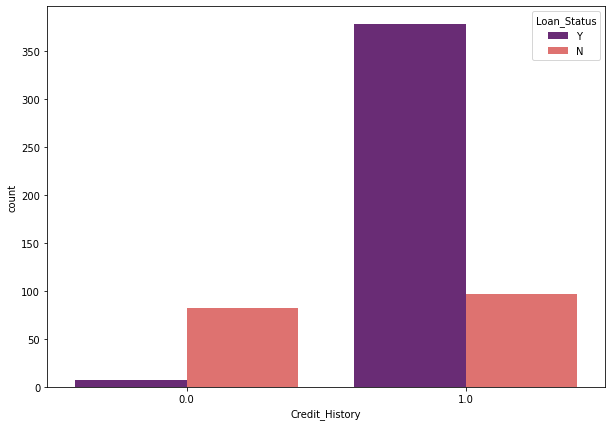

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(x='Credit_History', data=train, hue='Loan_Status', palette='magma')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

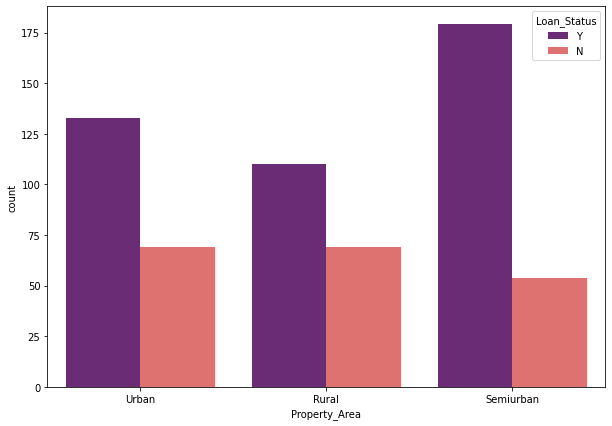

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x='Property_Area', data=train, hue='Loan_Status', palette='magma')

<AxesSubplot:>

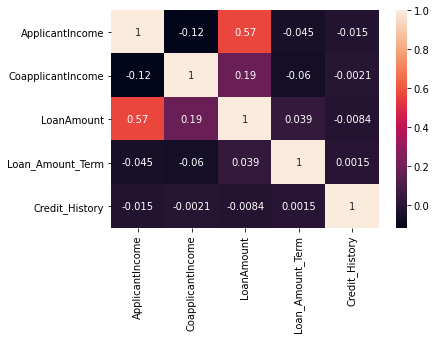

In [19]:
sns.heatmap(train.corr(),annot=True)

In [20]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
train.dropna(how='any', inplace=True)
train.shape

(480, 13)

In [29]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [31]:
obj_col = train.select_dtypes('object').columns
le = LabelEncoder()
for col in obj_col:
    train[col] = le.fit_transform(train[col])

In [32]:
train.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [22]:
test = pd.read_csv('./test.csv')

In [23]:
test.shape

(367, 12)

In [25]:
test.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [27]:
test.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      338.000000  
mean         0.825444  
std          0.380150  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000